In [79]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [80]:
from __future__ import print_function #for compatibility beteen python2 and python3

# all other needed modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant BUT  
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework
import os
import pandas as pd

# Find data on the portal

 Using TRASH data provided by the DSNY (Monthly Tonnage Data)
 
 I copy and paste below the CSV link https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD

# solution 1: download from the portal 


In [81]:
!curl https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD > trash.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41414    0 41414    0     0   122k      0 --:--:-- --:--:-- --:--:--  122k


In [82]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/eb3237/PUIdata


In [83]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/eb3237/PUIdata


In [84]:
# move the data
!mv trash.csv $PUIDATA

In [85]:
#test if the data is there
!ls $PUIDATA

dhsdaily.csv  dobmonthly.csv  trash.csv


## read in the data with pandas

In [88]:
#read in the data with pandas
import pandas as pd
trash = pd.read_csv("%s/trash.csv"%os.getenv("PUIDATA"))

In [90]:
#print the fist 7 lines out
trash.head(7)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2017 / 08,Manhattan,7,4754.7,997.3,720.0,19.4,NaN,NaN,NaN,1
1,2017 / 08,Manhattan,12,4996.5,494.5,530.3,NaN,NaN,NaN,NaN,1
2,2017 / 08,Queens,8,3805.1,461.0,412.8,NaN,NaN,NaN,NaN,4
3,2017 / 08,Brooklyn,18,5907.8,584.1,599.3,NaN,NaN,NaN,NaN,3
4,2017 / 08,Queens,5,4827.9,597.6,758.9,185.3,NaN,NaN,NaN,4
5,2017 / 08,Bronx,9,4003.6,215.7,335.8,NaN,NaN,NaN,NaN,2
6,2017 / 08,Brooklyn,2,2448.5,544.3,360.0,53.5,NaN,NaN,NaN,3


In [91]:
#print the last 3 lines out
trash.tail(3)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
823,2018 / 09,Brooklyn,6,1278.9,322.4,229.1,58.1,18.3,NaN,NaN,3
824,2018 / 09,Queens,9,2188.8,246.9,288.5,106.7,13.1,NaN,NaN,4
825,2018 / 09,Queens,4,2384.0,193.4,223.5,NaN,NaN,NaN,NaN,4


In [92]:
#look at the columns available, those are the variables
trash.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'],
      dtype='object')

In [93]:
#count how many rows, those are the data points
trash.size

9086

In [94]:
#select 2 columns only for plotting
trash_2c = trash[['REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED']]

In [95]:
trash_2c.head()

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED
0,4754.7,997.3
1,4996.5,494.5
2,3805.1,461.0
3,5907.8,584.1
4,4827.9,597.6


In [96]:
#I will change the names of the columns (variables) 
trash_2c.rename(columns = {'REFUSETONSCOLLECTED':'Tons of All Refuse Collected', 
               'PAPERTONSCOLLECTED':'Tons of Paper Collected'}, inplace=True)
trash_2c

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Tons of All Refuse Collected,Tons of Paper Collected
0,4754.7,997.3
1,4996.5,494.5
2,3805.1,461.0
3,5907.8,584.1
4,4827.9,597.6
5,4003.6,215.7
6,2448.5,544.3
7,5168.9,365.9
8,3165.5,521.0
9,2118.4,115.2


## plot the data

Populating the interactive namespace from numpy and matplotlib


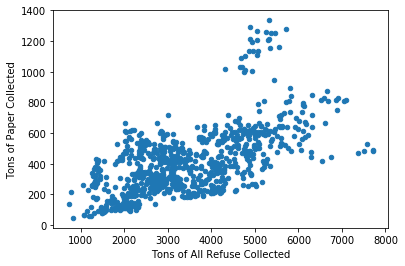

In [97]:
%pylab inline
trash_2c.plot(x="Tons of All Refuse Collected", y="Tons of Paper Collected", kind='scatter');


Figure 1: Total number of tons of all refuse against the amount of paper garbage collected in NYC as reported by the Department of Sanitation between 2017/08 and 2018/09. The two variables display a strong correlation. 

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [113]:
url = "https://data.cityofnewyork.us/resource/8bkb-pvci.json"

In [114]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [115]:
# print it out
df.head(3)

,borough,borough_id,communitydistrict,leavesorganictons,mgptonscollected,month,papertonscollected,refusetonscollected,resorganicstons,schoolorganictons,xmastreetons
0,Queens,4,4,5.07,394.00,2017 / 11,349.78,3997.15,NaN,NaN,NaN
1,Queens,4,11,NaN,396.53,2017 / 10,483.03,2691.88,236.41,NaN,NaN
2,Queens,4,7,NaN,694.62,2017 / 08,808.68,7058.92,NaN,NaN,NaN


In [116]:
df.tail(3)

,borough,borough_id,communitydistrict,leavesorganictons,mgptonscollected,month,papertonscollected,refusetonscollected,resorganicstons,schoolorganictons,xmastreetons
823,Queens,4,10,NaN,392.96,2018 / 02,327.61,2798.00,59.69,NaN,NaN
824,Brooklyn,3,16,NaN,137.00,2018 / 04,100.31,2131.05,22.34,NaN,NaN
825,Queens,4,1,NaN,574.26,2018 / 04,564.75,3717.46,NaN,NaN,NaN


In [117]:
df.columns

Index(['borough', 'borough_id', 'communitydistrict', 'leavesorganictons',
       'mgptonscollected', 'month', 'papertonscollected',
       'refusetonscollected', 'resorganicstons', 'schoolorganictons',
       'xmastreetons'],
      dtype='object')

In [118]:
#now select a community district, date and 2 variables. 
#working with a CSV file that contains a date/time column and a numerical value as per instructions. 
trash_4c = df[['refusetonscollected', 'papertonscollected', 'communitydistrict', 'month']]
trash_4c

,refusetonscollected,papertonscollected,communitydistrict,month
0,3997.15,349.78,4,2017 / 11
1,2691.88,483.03,11,2017 / 10
2,7058.92,808.68,7,2017 / 08
3,1870.63,105.14,1,2017 / 09
4,2951.58,438.97,6,2018 / 08
5,2996.15,235.52,9,2018 / 07
6,4748.06,494.35,12,2017 / 12
7,6118.22,796.56,3,2018 / 08
8,3843.95,482.48,8,2018 / 06
9,1961.71,462.34,2,2017 / 12


For consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [119]:
trash_4c.rename(columns = {'refusetonscollected':'Tons of All Refuse Collected', 
               'papertonscollected':'Tons of Paper Collected', 
               'communitydistrict': 'Community District', 'month': 'Month'}, inplace=True)
trash_4c

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Tons of All Refuse Collected,Tons of Paper Collected,Community District,Month
0,3997.15,349.78,4,2017 / 11
1,2691.88,483.03,11,2017 / 10
2,7058.92,808.68,7,2017 / 08
3,1870.63,105.14,1,2017 / 09
4,2951.58,438.97,6,2018 / 08
5,2996.15,235.52,9,2018 / 07
6,4748.06,494.35,12,2017 / 12
7,6118.22,796.56,3,2018 / 08
8,3843.95,482.48,8,2018 / 06
9,1961.71,462.34,2,2017 / 12


Populating the interactive namespace from numpy and matplotlib


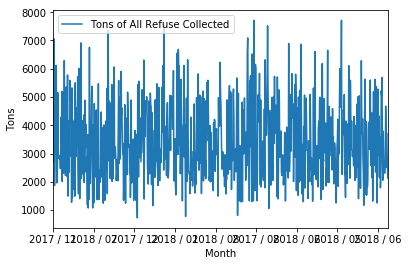

In [120]:
#as a default this plot wont have a y label, but all plots must have axis labels!
%pylab inline
ax = trash_4c.plot(x='Month', y='Tons of All Refuse Collected');
ax.set_ylabel("Tons");

Figure 2. We could see the seasonality on the graph; however the visualization is not very informative. I will use some timestamp manipulation provided by the teacher in Assignment2_example. 

In [121]:
trash_4c["Month"] = trash_4c["Month"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [131]:
trash_4c.Month

0     2017-11-01
1     2017-10-01
2     2017-08-01
3     2017-09-01
4     2018-08-01
5     2018-07-01
6     2017-12-01
7     2018-08-01
8     2018-06-01
9     2017-12-01
10    2017-10-01
11    2018-07-01
12    2018-07-01
13    2018-01-01
14    2017-10-01
15    2018-07-01
16    2017-12-01
17    2018-09-01
18    2017-08-01
19    2017-08-01
20    2018-08-01
21    2018-01-01
22    2018-09-01
23    2018-08-01
24    2017-10-01
25    2017-12-01
26    2017-11-01
27    2017-11-01
28    2018-08-01
29    2018-07-01
         ...    
796   2018-06-01
797   2018-07-01
798   2018-02-01
799   2018-05-01
800   2018-06-01
801   2018-05-01
802   2018-05-01
803   2018-06-01
804   2018-04-01
805   2018-06-01
806   2018-02-01
807   2018-02-01
808   2018-06-01
809   2018-05-01
810   2018-05-01
811   2018-04-01
812   2018-02-01
813   2018-02-01
814   2018-04-01
815   2018-06-01
816   2018-05-01
817   2018-06-01
818   2018-02-01
819   2018-04-01
820   2018-02-01
821   2018-05-01
822   2018-02-01
823   2018-02-

now that I am using timestamps (instead of strings as the data got read in form the json file) Pandas know to rotate the labels appropriately so I can drop rot=90

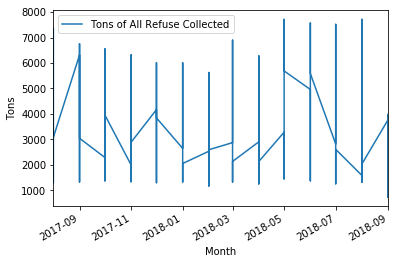

In [124]:
ax = trash_4c.plot(x='Month', y='Tons of All Refuse Collected')
ax.set_ylabel("Tons");

Figure 2. We could see the seasonality on the graph; however again, the visualization is bad.

Also, I want to group data by date, to see how much trash each community district produced in each month. 


In [132]:
trash_4c

,Tons of All Refuse Collected,Tons of Paper Collected,Community District,Month
0,3997.15,349.78,4,2017-11-01
1,2691.88,483.03,11,2017-10-01
2,7058.92,808.68,7,2017-08-01
3,1870.63,105.14,1,2017-09-01
4,2951.58,438.97,6,2018-08-01
5,2996.15,235.52,9,2018-07-01
6,4748.06,494.35,12,2017-12-01
7,6118.22,796.56,3,2018-08-01
8,3843.95,482.48,8,2018-06-01
9,1961.71,462.34,2,2017-12-01


In [125]:
trash_4c_group_month = trash_4c.groupby([ 'Month','Community District']).sum()
trash_4c_group_month

Tons of All Refuse Collected  \
Month      Community District                                 
2017-08-01 1                                       17409.06   
           2                                       13471.96   
           3                                       20631.91   
           4                                       14103.44   
           5                                       14753.08   
           6                                       10076.85   
           7                                       19045.45   
           8                                       13966.27   
           9                                       13942.53   
           10                                      12464.76   
           11                                      13162.15   
           12                                      21640.60   
           13                                       8215.46   
           14                                       8168.68   
           15                                       4288.63   
           16                                       2281.78   
           17                                       4701.66   
           18                                       5907.84   
2017-09-01 1                                       17372.63   
           2                                       12963.36   
           3                                       19513.42   
           4                                       13358.90   
           5                                       13942.47   
           6                                        9855.39   
           7                                       18318.06   
           8                                       13952.53   
           9                                       13392.09   
           10                                      11743.90   
           11                                      12642.10   
           12                                      21516.47   
...                                                     ...   
2018-08-01 7                                       18935.74   
           8                                       14044.63   
           9                                       13817.92   
           10                                      12959.89   
           11                                      13775.48   
           12                                      22323.98   
           13                                       7833.54   
           14                                       8134.63   
           15                                       4368.47   
           16                                       2260.70   
           17                                       4889.35   
           18                                       6230.04   
2018-09-01 1                                       10365.28   
           2                                        7512.35   
           3                                       11309.38   
           4                                        7880.80   
           5                                        8030.24   
           6                                        5647.10   
           7                                       10255.41   
           8                                        7959.78   
           9                                        7420.87   
           10                                       7012.72   
           11                                       7411.77   
           12                                      12510.14   
           13                                       4036.36   
           14                                       4436.88   
           15                                       2569.91   
           16                                       1188.36   
           17                                       2592.13   
           18                                       3237.74   

                               Tons of Paper Collected  
Mont

Populating the interactive namespace from numpy and matplotlib


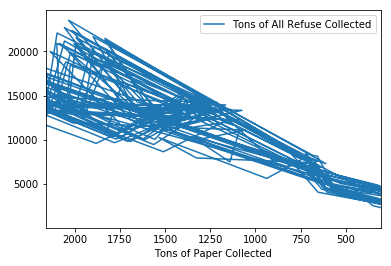

In [129]:
#trying to plot - NO SUCCESS.....
%pylab inline
ax = trash_4c_group_month.plot(x='Tons of Paper Collected', y='Tons of All Refuse Collected');

Now, I will group data by Community district, basically the same but different data presentation - we can look at dynamics of each Community district over time.

In [109]:
trash_4c_cd = trash_4c.groupby(['Community District', 'Month' ]).sum()
trash_4c_cd

Tons of All Refuse Collected  \
Community District Month                                     
1                  2017 / 08                      17409.06   
                   2017 / 09                      17372.63   
                   2017 / 10                      17679.44   
                   2017 / 11                      17709.03   
                   2017 / 12                      16577.98   
                   2018 / 01                      16940.42   
                   2018 / 02                      15323.64   
                   2018 / 03                      17412.91   
                   2018 / 04                      16909.78   
                   2018 / 05                      19320.99   
                   2018 / 06                      18235.44   
                   2018 / 07                      17519.31   
                   2018 / 08                      17819.52   
                   2018 / 09                      10365.28   
2                  2017 / 08                      13471.96   
                   2017 / 09                      12963.36   
                   2017 / 10                      13131.16   
                   2017 / 11                      13264.08   
                   2017 / 12                      12404.53   
                   2018 / 01                      12556.71   
                   2018 / 02                      11151.84   
                   2018 / 03                      12413.50   
                   2018 / 04                      12596.36   
                   2018 / 05                      14681.78   
                   2018 / 06                      13955.11   
                   2018 / 07                      13451.04   
                   2018 / 08                      13669.65   
                   2018 / 09                       7512.35   
3                  2017 / 08                      20631.91   
                   2017 / 09                      19513.42   
...                                                    ...   
16                 2018 / 08                       2260.70   
                   2018 / 09                       1188.36   
17                 2017 / 08                       4701.66   
                   2017 / 09                       4375.49   
                   2017 / 10                       4303.63   
                   2017 / 11                       4238.74   
                   2017 / 12                       4170.82   
                   2018 / 01                       3973.03   
                   2018 / 02                       3573.03   
                   2018 / 03                       3935.08   
                   2018 / 04                       4107.25   
                   2018 / 05                       4734.94   
                   2018 / 06                       4749.31   
                   2018 / 07                       4902.30   
                   2018 / 08                       4889.35   
                   2018 / 09                       2592.13   
18                 2017 / 08                       5907.84   
                   2017 / 09                       5592.44   
                   2017 / 10                       5380.15   
                   2017 / 11                       5504.06   
                   2017 / 12                       5142.07   
                   2018 / 01                       4859.38   
                   2018 / 02                       4365.18   
                   2018 / 03                       5015.12   
                   2018 / 04                       5087.03   
                   2018 / 05                       6155.70   
                   2018 / 06                       6109.65   
                   2018 / 07                       6091.96   
                   2018 / 08                       6230.04   
                   2018 / 09                       3237.74   

                              Tons of Paper Collected  
Community District Month                               
1          

In [110]:
#trying to plot
%pylab inline
ax = trash_4c_cd.plot(x='Month', y='Tons of All Refuse Collected');

Populating the interactive namespace from numpy and matplotlib


KeyError: 'Month'

In [111]:
#trying to deal with unability to plot the groupby data: using "filtered"
trash_filtered = trash_4c[trash_4c['Community District'] == 1].groupby(['Community District', 'Month']).sum()
trash_filtered

Tons of All Refuse Collected  \
Community District Month                                     
1                  2017 / 08                      17409.06   
                   2017 / 09                      17372.63   
                   2017 / 10                      17679.44   
                   2017 / 11                      17709.03   
                   2017 / 12                      16577.98   
                   2018 / 01                      16940.42   
                   2018 / 02                      15323.64   
                   2018 / 03                      17412.91   
                   2018 / 04                      16909.78   
                   2018 / 05                      19320.99   
                   2018 / 06                      18235.44   
                   2018 / 07                      17519.31   
                   2018 / 08                      17819.52   
                   2018 / 09                      10365.28   

                              Tons of Paper Collected  
Community District Month                               
1                  2017 / 08                  2161.42  
                   2017 / 09                  2284.97  
                   2017 / 10                  2194.85  
                   2017 / 11                  2306.75  
                   2017 / 12                  2551.30  
                   2018 / 01                  2373.58  
                   2018 / 02                  2084.99  
                   2018 / 03                  2369.57  
                   2018 / 04                  2241.33  
                   2018 / 05                  2393.79  
                   2018 / 06                  2446.85  
                   2018 / 07                  2216.23  
                   2018 / 08                  2367.59  
                   2018 / 09                  1352.88

In [112]:
#again trying to plot over time... cannot access the corresponding groupby dataframe in a groupby object by the key
%pylab inline
ax = trash_filtered.plot(x='Month', y='Tons of All Refuse Collected');


Populating the interactive namespace from numpy and matplotlib


KeyError: 'Month'